# Titanic Survival Prediction with Advanced Deep Neural Network

## Overview
This notebook implements a comprehensive analysis of the Titanic dataset using an advanced Deep Neural Network (DNN) approach with proper pipeline practices to avoid data leakage.

## Key Features
- **Advanced DNN Architecture**: Multi-layer perceptron with batch normalization and dropout
- **Proper Pipeline**: All preprocessing fitted on training data only
- **Comprehensive EDA**: Detailed exploratory data analysis
- **Feature Engineering**: Advanced feature creation and selection
- **Cross-validation**: Robust model evaluation
- **Model Comparison**: Comparison with traditional ML models

## Pipeline Structure
1. **Data Loading and Initial Exploration**
2. **Exploratory Data Analysis (EDA)**
3. **Advanced Feature Engineering**
4. **Data Preprocessing Pipeline**
5. **Advanced DNN Model Development**
6. **Model Evaluation and Analysis**
7. **Predictions and Submission**


In [3]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
TensorFlow version: 2.20.0
NumPy version: 2.3.2
Pandas version: 2.3.1


In [7]:
# Load the datasets
import os

# Get the current working directory and ensure we're in the right place
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# List files to verify they exist
print("Files in current directory:")
print(os.listdir('.'))

# Load the datasets with absolute paths
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

print("Dataset shapes:")
print(f"Training set: {train_df.shape}")
print(f"Test set: {test_df.shape}")
print(f"Gender submission: {gender_submission.shape}")

print("\nTraining set columns:")
print(train_df.columns.tolist())

print("\nTraining set info:")
print(train_df.info())

print("\nTraining set first few rows:")
display(train_df.head())

Current working directory: c:\Users\PC\Desktop\Final 3
Files in current directory:
['.venv', 'gender_submission.csv', 'requirements.txt', 'test.csv', 'titanic.ipynb', 'titanic_advanced_dnn_submission.csv', 'train.csv']
Dataset shapes:
Training set: (891, 12)
Test set: (418, 11)
Gender submission: (418, 2)

Training set columns:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Training set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Tic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


=== BASIC STATISTICS ===

Training set statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Missing values in training set:
Age         177
Cabin       687
Embarked      2
dtype: int64

Missing values in test set:
Age       86
Fare       1
Cabin    327
dtype: int64


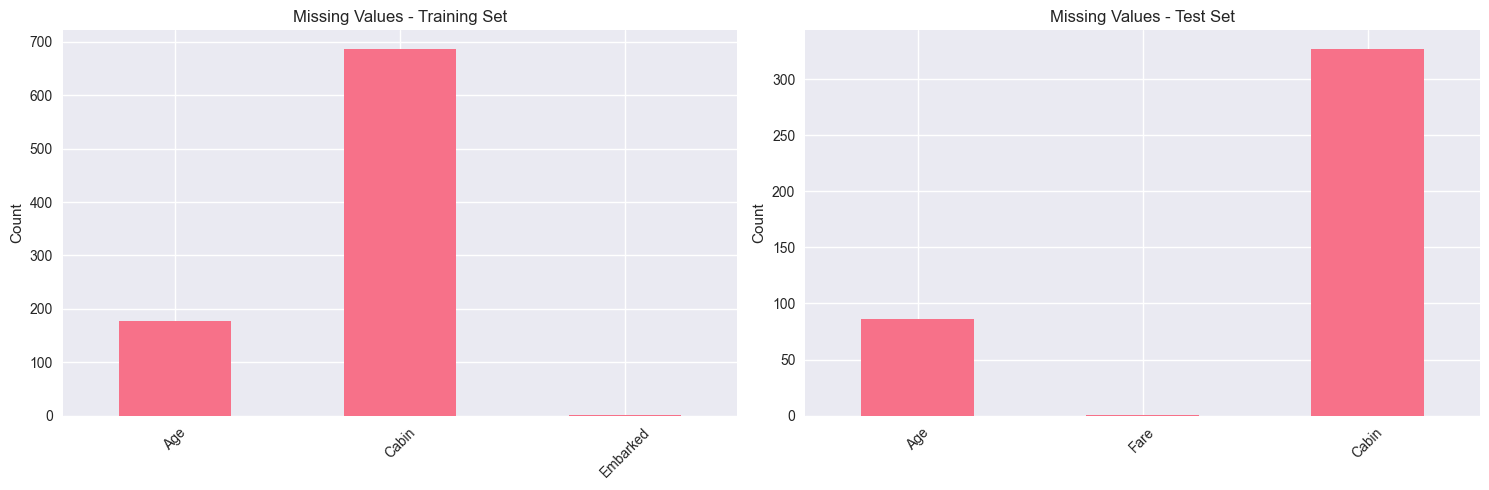

In [8]:
# Basic statistics and missing values
print("=== BASIC STATISTICS ===")
print("\nTraining set statistics:")
display(train_df.describe())

print("\nMissing values in training set:")
missing_train = train_df.isnull().sum()
print(missing_train[missing_train > 0])

print("\nMissing values in test set:")
missing_test = test_df.isnull().sum()
print(missing_test[missing_test > 0])

# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set missing values
missing_train_plot = missing_train[missing_train > 0]
if len(missing_train_plot) > 0:
    missing_train_plot.plot(kind='bar', ax=axes[0])
    axes[0].set_title('Missing Values - Training Set')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)

# Test set missing values
missing_test_plot = missing_test[missing_test > 0]
if len(missing_test_plot) > 0:
    missing_test_plot.plot(kind='bar', ax=axes[1])
    axes[1].set_title('Missing Values - Test Set')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

=== TARGET VARIABLE ANALYSIS ===
Survival distribution:
Survived
0    549
1    342
Name: count, dtype: int64
Survival rate: 0.384


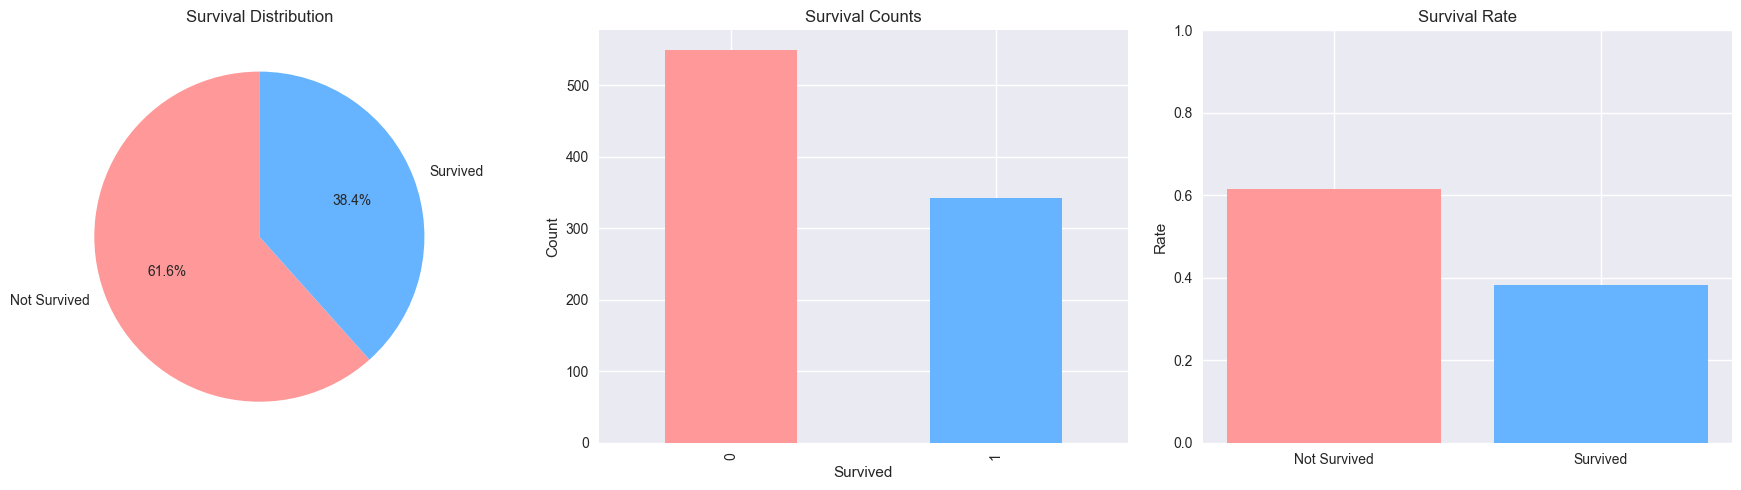

In [9]:
# Target variable analysis
print("=== TARGET VARIABLE ANALYSIS ===")
survival_counts = train_df['Survived'].value_counts()
print(f"Survival distribution:\n{survival_counts}")
print(f"Survival rate: {survival_counts[1] / len(train_df):.3f}")

# Visualize survival distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pie chart
axes[0].pie(survival_counts.values, labels=['Not Survived', 'Survived'], 
            autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
axes[0].set_title('Survival Distribution')

# Bar plot
survival_counts.plot(kind='bar', ax=axes[1], color=['#ff9999', '#66b3ff'])
axes[1].set_title('Survival Counts')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Count')

# Survival rate
axes[2].bar(['Not Survived', 'Survived'], 
            [survival_counts[0]/len(train_df), survival_counts[1]/len(train_df)],
            color=['#ff9999', '#66b3ff'])
axes[2].set_title('Survival Rate')
axes[2].set_ylabel('Rate')
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

=== CATEGORICAL VARIABLES ANALYSIS ===


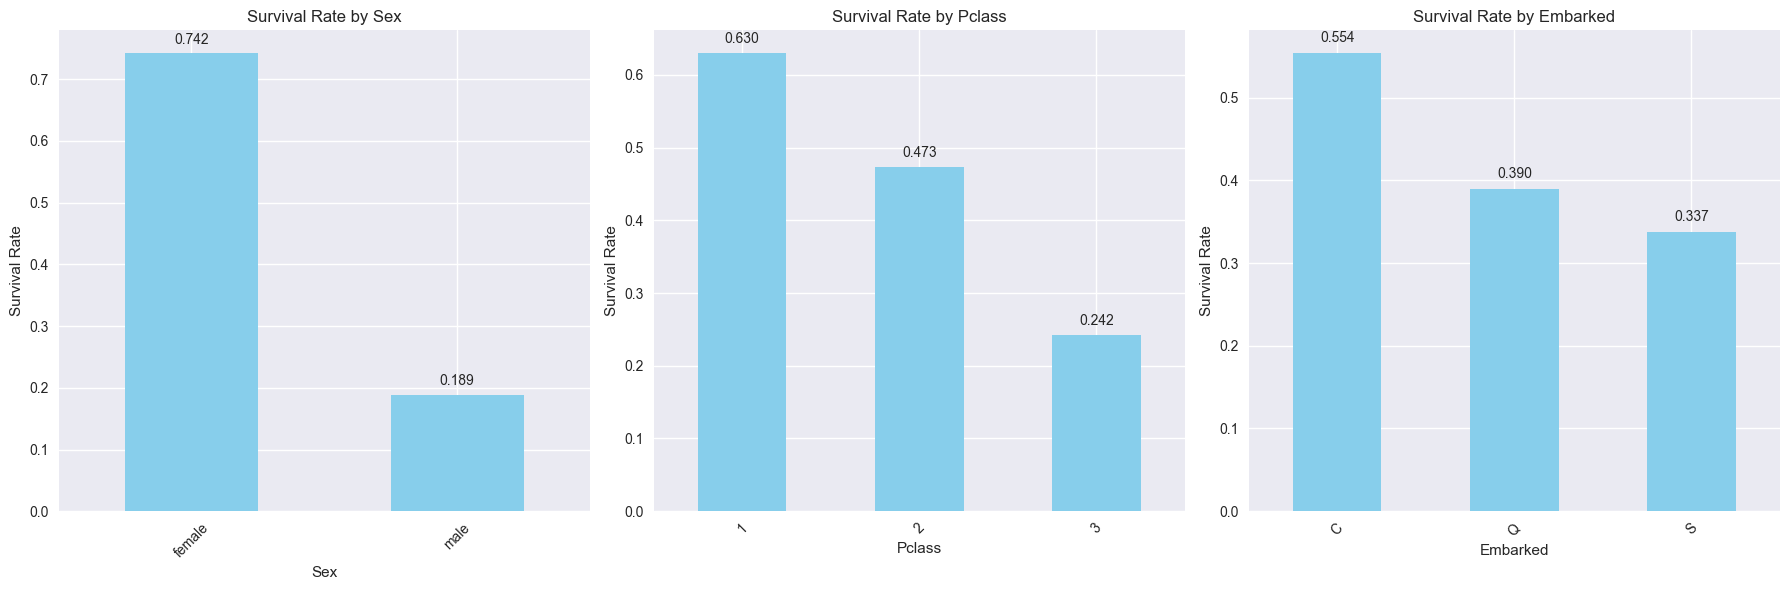


Sex survival rates:
        count      mean  sum
Sex                         
female    314  0.742038  233
male      577  0.188908  109

Pclass survival rates:
        count      mean  sum
Pclass                      
1         216  0.629630  136
2         184  0.472826   87
3         491  0.242363  119

Embarked survival rates:
          count      mean  sum
Embarked                      
C           168  0.553571   93
Q            77  0.389610   30
S           644  0.336957  217


In [10]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ANALYSIS ===")

categorical_cols = ['Sex', 'Pclass', 'Embarked']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(categorical_cols):
    # Create survival rate by category
    survival_rate = train_df.groupby(col)['Survived'].mean().sort_values(ascending=False)
    
    # Plot
    survival_rate.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Survival Rate by {col}')
    axes[i].set_ylabel('Survival Rate')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels
    for j, v in enumerate(survival_rate.values):
        axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed statistics
for col in categorical_cols:
    print(f"\n{col} survival rates:")
    print(train_df.groupby(col)['Survived'].agg(['count', 'mean', 'sum']))

=== NUMERICAL VARIABLES ANALYSIS ===

Age statistics by survival:
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0

SibSp statistics by survival:
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0

Parch statistics by survival:
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.329690  0.823166  0.0  0.0  0.0  0.0  6.0
1         342.0  0.464912  0.771712  0.0  0.0  0.0  1.0  5.0

Fare statistics by survival:
          count       mean        std  min      25%   50%   75%       max
Survived

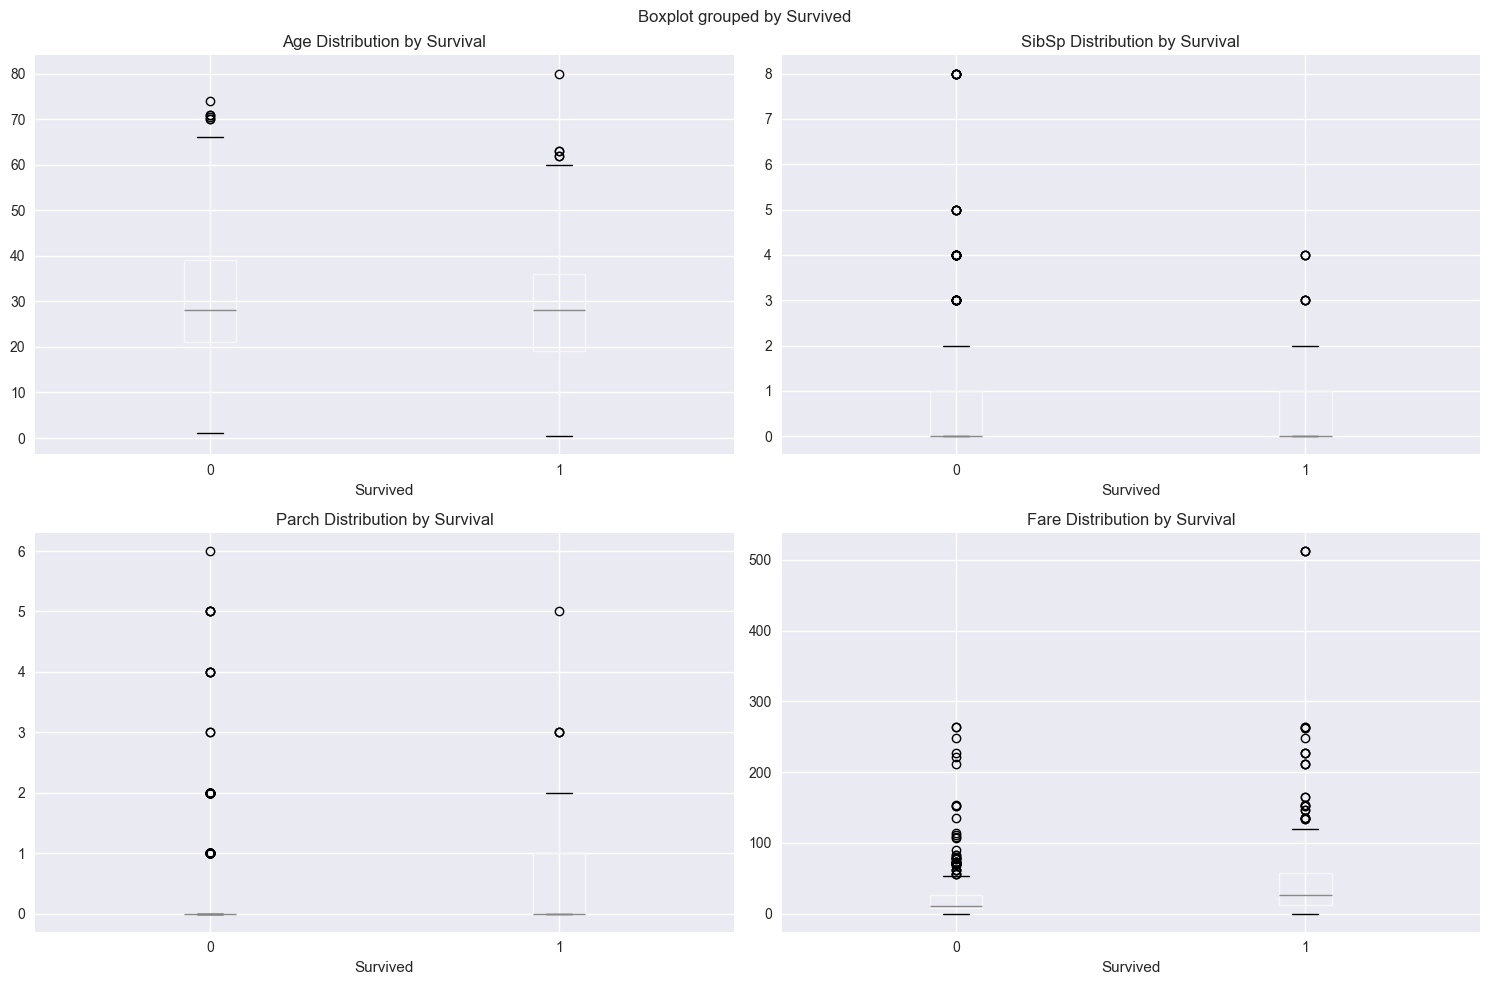

In [11]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ANALYSIS ===")

numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    # Box plot by survival
    train_df.boxplot(column=col, by='Survived', ax=axes[i])
    axes[i].set_title(f'{col} Distribution by Survival')
    axes[i].set_xlabel('Survived')
    
    # Print statistics
    print(f"\n{col} statistics by survival:")
    print(train_df.groupby('Survived')[col].describe())

plt.tight_layout()
plt.show()

=== CORRELATION ANALYSIS ===


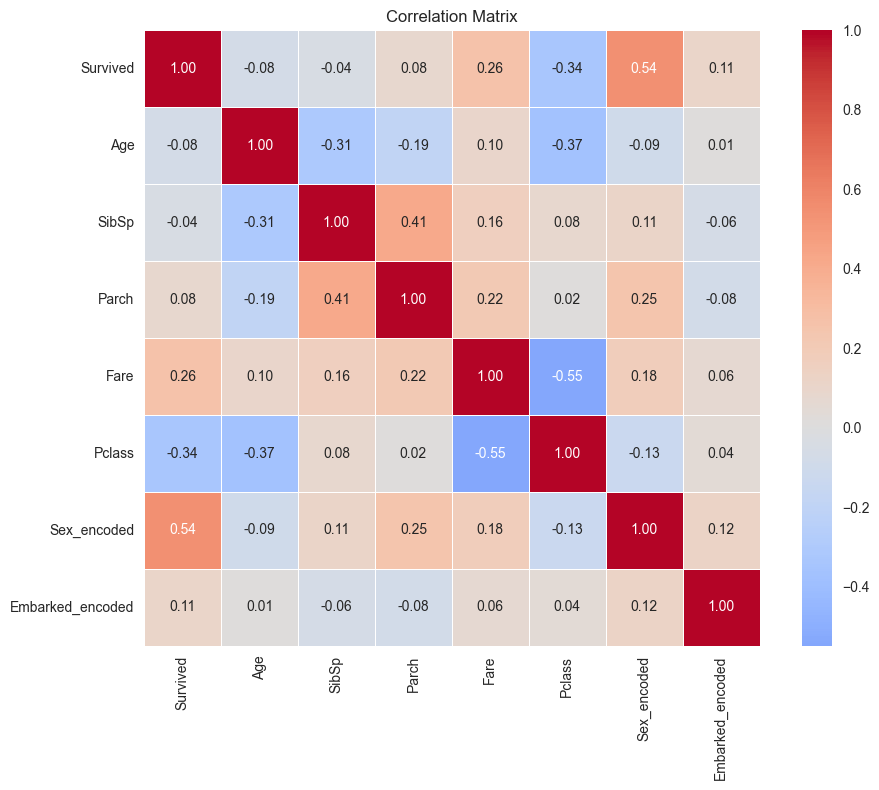


Correlations with Survived:
Survived            1.000000
Sex_encoded         0.543351
Fare                0.257307
Embarked_encoded    0.108669
Parch               0.081629
SibSp              -0.035322
Age                -0.077221
Pclass             -0.338481
Name: Survived, dtype: float64


In [12]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")

# Create correlation matrix for numerical variables
numerical_df = train_df[['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass']].copy()

# Add encoded categorical variables
numerical_df['Sex_encoded'] = (train_df['Sex'] == 'female').astype(int)
numerical_df['Embarked_encoded'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Show correlations with target variable
print("\nCorrelations with Survived:")
survival_correlations = correlation_matrix['Survived'].sort_values(ascending=False)
print(survival_correlations)

In [13]:
# Advanced feature engineering function
def engineer_features(df):
    """
    Create advanced features from existing data.
    This function should be applied to both train and test sets.
    """
    df_eng = df.copy()
    
    # Extract title from Name
    df_eng['Title'] = df_eng['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Create family size
    df_eng['FamilySize'] = df_eng['SibSp'] + df_eng['Parch'] + 1
    
    # Create is_alone feature
    df_eng['IsAlone'] = (df_eng['FamilySize'] == 1).astype(int)
    
    # Create fare per person
    df_eng['FarePerPerson'] = df_eng['Fare'] / df_eng['FamilySize']
    
    # Create age groups
    df_eng['AgeGroup'] = pd.cut(df_eng['Age'], 
                                bins=[0, 12, 18, 35, 60, 100], 
                                labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
    
    # Create fare groups
    df_eng['FareGroup'] = pd.cut(df_eng['Fare'], 
                                 bins=[0, 7.91, 14.45, 31, 1000], 
                                 labels=['Low', 'Medium', 'High', 'Very High'])
    
    # Create cabin features
    df_eng['HasCabin'] = df_eng['Cabin'].notna().astype(int)
    df_eng['CabinDeck'] = df_eng['Cabin'].str[0] if 'Cabin' in df_eng.columns else 'Unknown'
    
    # Create ticket features
    df_eng['TicketPrefix'] = df_eng['Ticket'].str.extract('([A-Za-z]+)', expand=False)
    df_eng['TicketNumber'] = df_eng['Ticket'].str.extract('(\d+)', expand=False).astype(float)
    
    # Create interaction features
    df_eng['Sex_Pclass'] = df_eng['Sex'] + '_' + df_eng['Pclass'].astype(str)
    df_eng['Age_Fare'] = df_eng['Age'] * df_eng['Fare']
    
    return df_eng

# Apply feature engineering
train_eng = engineer_features(train_df)
test_eng = engineer_features(test_df)

print("Advanced feature engineering completed!")
print(f"New features created: Title, FamilySize, IsAlone, FarePerPerson, AgeGroup, FareGroup, HasCabin, CabinDeck, TicketPrefix, TicketNumber, Sex_Pclass, Age_Fare")

# Show new features
print("\nNew features in training set:")
new_features = ['Title', 'FamilySize', 'IsAlone', 'FarePerPerson', 'AgeGroup', 'FareGroup', 'HasCabin', 'CabinDeck', 'TicketPrefix', 'TicketNumber', 'Sex_Pclass', 'Age_Fare']
display(train_eng[new_features].head())

Advanced feature engineering completed!
New features created: Title, FamilySize, IsAlone, FarePerPerson, AgeGroup, FareGroup, HasCabin, CabinDeck, TicketPrefix, TicketNumber, Sex_Pclass, Age_Fare

New features in training set:


,Title,FamilySize,IsAlone,FarePerPerson,AgeGroup,FareGroup,HasCabin,CabinDeck,TicketPrefix,TicketNumber,Sex_Pclass,Age_Fare
0,Mr,2,0,3.62500,Young Adult,Low,0,NaN,A,5.0,male_3,159.5000
1,Mrs,2,0,35.64165,Adult,Very High,1,C,PC,17599.0,female_1,2708.7654
2,Miss,1,1,7.92500,Young Adult,Medium,0,NaN,STON,2.0,female_3,206.0500
3,Mrs,2,0,26.55000,Young Adult,Very High,1,C,NaN,113803.0,female_1,1858.5000
4,Mr,1,1,8.05000,Young Adult,Medium,0,NaN,NaN,373450.0,male_3,281.7500


=== NEW FEATURES ANALYSIS ===

Title distribution and survival rates:
          count      mean
Title                    
Mr          517  0.156673
Miss        182  0.697802
Mrs         125  0.792000
Master       40  0.575000
Dr            7  0.428571
Rev           6  0.000000
Mlle          2  1.000000
Major         2  0.500000
Col           2  0.500000
Capt          1  0.000000
Lady          1  1.000000
Countess      1  1.000000
Don           1  0.000000
Jonkheer      1  0.000000
Mme           1  1.000000
Ms            1  1.000000
Sir           1  1.000000

Family size survival rates:
            count      mean
FamilySize                 
1             537  0.303538
2             161  0.552795
3             102  0.578431
4              29  0.724138
5              15  0.200000
6              22  0.136364
7              12  0.333333
8               6  0.000000
11              7  0.000000


<Figure size 1200x500 with 0 Axes>

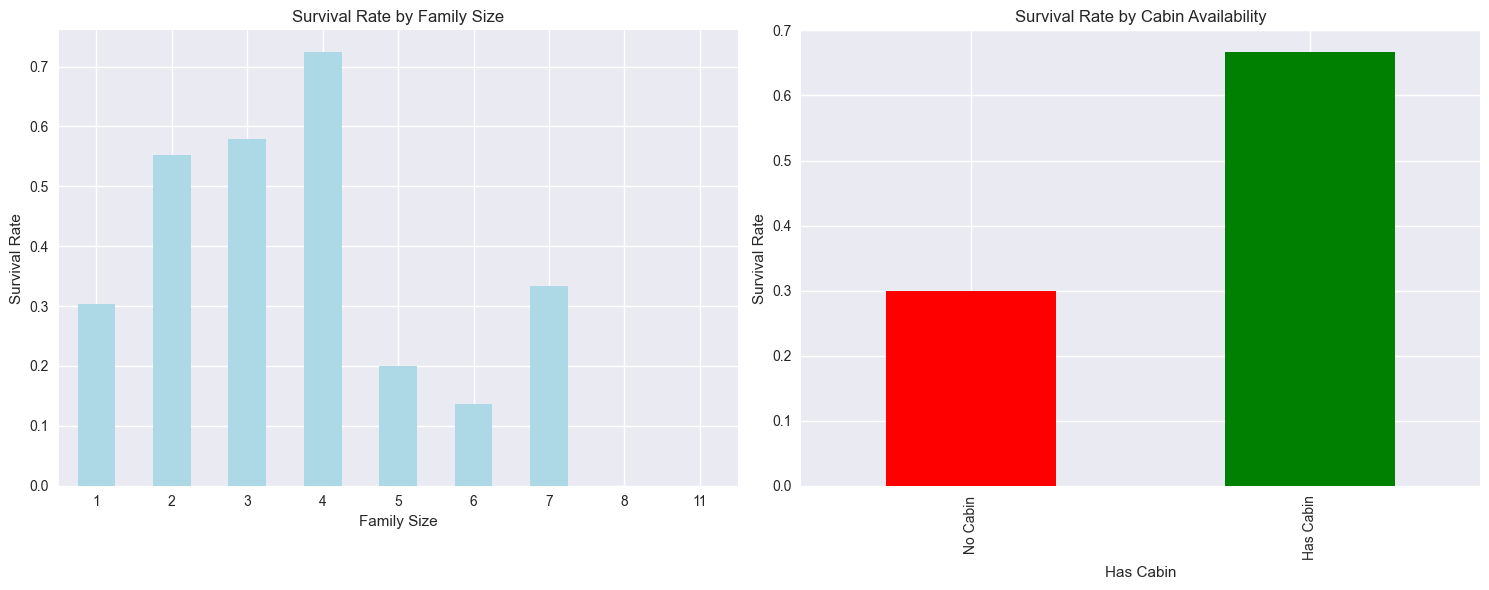

In [14]:
# Analyze new features
print("=== NEW FEATURES ANALYSIS ===")

# Title analysis
print("\nTitle distribution and survival rates:")
title_survival = train_eng.groupby('Title')['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)
print(title_survival)

# Family size analysis
print("\nFamily size survival rates:")
family_survival = train_eng.groupby('FamilySize')['Survived'].agg(['count', 'mean']).sort_index()
print(family_survival)

# Visualize family size vs survival
plt.figure(figsize=(12, 5))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Family size survival rate
family_survival['mean'].plot(kind='bar', ax=ax1, color='lightblue')
ax1.set_title('Survival Rate by Family Size')
ax1.set_xlabel('Family Size')
ax1.set_ylabel('Survival Rate')
ax1.tick_params(axis='x', rotation=0)

# HasCabin survival rate
cabin_survival = train_eng.groupby('HasCabin')['Survived'].mean()
cabin_survival.plot(kind='bar', ax=ax2, color=['red', 'green'])
ax2.set_title('Survival Rate by Cabin Availability')
ax2.set_xlabel('Has Cabin')
ax2.set_ylabel('Survival Rate')
ax2.set_xticklabels(['No Cabin', 'Has Cabin'])

plt.tight_layout()
plt.show()

In [15]:
# Define features for the model
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 
                'Title', 'FamilySize', 'IsAlone', 'FarePerPerson', 'HasCabin', 
                'CabinDeck', 'TicketPrefix', 'TicketNumber', 'Sex_Pclass', 'Age_Fare']

# Separate numerical and categorical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 
                     'FarePerPerson', 'TicketNumber', 'Age_Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'HasCabin', 
                       'CabinDeck', 'TicketPrefix', 'Sex_Pclass']

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")
print(f"Total features: {len(feature_cols)}")

# Create advanced preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer

# Numerical pipeline with KNN imputation
numerical_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='drop'
)

print("Advanced preprocessing pipeline created successfully!")

Numerical features: ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'FarePerPerson', 'TicketNumber', 'Age_Fare']
Categorical features: ['Pclass', 'Sex', 'Embarked', 'Title', 'HasCabin', 'CabinDeck', 'TicketPrefix', 'Sex_Pclass']
Total features: 17
Advanced preprocessing pipeline created successfully!


In [16]:
# Prepare data for preprocessing
X_train_raw = train_eng[feature_cols]
y_train = train_eng['Survived']
X_test_raw = test_eng[feature_cols]

print(f"Training set shape: {X_train_raw.shape}")
print(f"Test set shape: {X_test_raw.shape}")
print(f"Target shape: {y_train.shape}")

# Fit preprocessor on training data only (to avoid data leakage)
X_train_processed = preprocessor.fit_transform(X_train_raw)
X_test_processed = preprocessor.transform(X_test_raw)

print(f"\nProcessed training set shape: {X_train_processed.shape}")
print(f"Processed test set shape: {X_test_processed.shape}")

# Get feature names after preprocessing - Fixed version
feature_names = numerical_features.copy()

# Add categorical feature names
categorical_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
for i, col in enumerate(categorical_features):
    categories = categorical_encoder.categories_[i]
    # Skip the first category (due to drop='first')
    for cat in categories[1:]:
        feature_names.append(f"{col}_{cat}")

print(f"\nFeature names after preprocessing: {len(feature_names)} features")
print(f"Feature names: {feature_names}")

Training set shape: (891, 17)
Test set shape: (418, 17)
Target shape: (891,)

Processed training set shape: (891, 60)
Processed test set shape: (418, 60)

Feature names after preprocessing: 60 features
Feature names: ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'FarePerPerson', 'TicketNumber', 'Age_Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Col', 'Title_Countess', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'HasCabin_1', 'CabinDeck_B', 'CabinDeck_C', 'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G', 'CabinDeck_T', 'TicketPrefix_C', 'TicketPrefix_CA', 'TicketPrefix_F', 'TicketPrefix_Fa', 'TicketPrefix_LINE', 'TicketPrefix_P', 'TicketPrefix_PC', 'TicketPrefix_PP', 'TicketPrefix_S', 'TicketPrefix_SC', 'TicketPrefix_SCO', 'TicketPrefix_SO', 'TicketPrefix_SOTON', 'TicketPrefix_STON', 'Ti

In [17]:
# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_processed, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test_processed.shape}")

# Convert to float32 for better performance
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test_processed = X_test_processed.astype('float32')

# Build advanced DNN model
def create_advanced_dnn_model(input_dim, learning_rate=0.001):
    """
    Create an advanced deep neural network model for binary classification.
    """
    model = keras.Sequential([
        # Input layer
        layers.Dense(256, activation='relu', input_dim=input_dim, 
                    kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        # Hidden layers
        layers.Dense(128, activation='relu', 
                    kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(64, activation='relu', 
                    kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(32, activation='relu', 
                    kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        # Output layer
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile model with advanced optimizer
    optimizer = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC', 'Precision', 'Recall']
    )
    
    return model

# Create model
model = create_advanced_dnn_model(X_train.shape[1])
print("Advanced DNN Model Architecture:")
model.summary()

Training set: (712, 60)
Validation set: (179, 60)
Test set: (418, 60)
Advanced DNN Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        15,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,801 (237.50 KB)

 Trainable params: 59,841 (233.75 KB)

 Non-trainable params: 960 (3.75 KB)

In [18]:
# Define advanced callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=8,
    min_lr=1e-7,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_auc',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train the model
print("Training the Advanced DNN model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=150,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    verbose=1
)

Training the Advanced DNN model...
Epoch 1/150
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6104 - Precision: 0.4492 - Recall: 0.5870 - accuracy: 0.5581 - loss: 0.8181

23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - AUC: 0.6687 - Precision: 0.5015 - Recall: 0.6154 - accuracy: 0.6180 - loss: 0.7691 - val_AUC: 0.7304 - val_Precision: 0.5581 - val_Recall: 0.3478 - val_accuracy: 0.6425 - val_loss: 0.7320 - learning_rate: 0.0010
Epoch 2/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7428 - Precision: 0.5855 - Recall: 0.6603 - accuracy: 0.6864 - loss: 0.6963

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - AUC: 0.7572 - Precision: 0.5899 - Recall: 0.6850 - accuracy: 0.6966 - loss: 0.6845 - val_AUC: 0.7772 - val_Precision: 0.7576 - val_Recall: 0.3623 - val_accuracy: 0.7095 - val_loss: 0.6912 - learning_rate: 0.0010
Epoch 3/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.8005 - Precision: 0.6571 - Recall: 0.7186 - accuracy: 0.7456 - loss: 0.6234

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - AUC: 0.7846 - Precision: 0.6397 - Recall: 0.6960 - accuracy: 0.7331 - loss: 0.6408 - val_AUC: 0.7975 - val_Precision: 0.7647 - val_Recall: 0.3768 - val_accuracy: 0.7151 - val_loss: 0.6622 - learning_rate: 0.0010
Epoch 4/150
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.8363 - Precision: 0.6659 - Recall: 0.7742 - accuracy: 0.7614 - loss: 0.5741

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - AUC: 0.8253 - Precision: 0.6592 - Recall: 0.7509 - accuracy: 0.7556 - loss: 0.5831 - val_AUC: 0.8258 - val_Precision: 0.7895 - val_Recall: 0.4348 - val_accuracy: 0.7374 - val_loss: 0.6271 - learning_rate: 0.0010
Epoch 5/150
21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8435 - Precision: 0.7085 - Recall: 0.7390 - accuracy: 0.7801 - loss: 0.5630

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 0.8385 - Precision: 0.6958 - Recall: 0.7289 - accuracy: 0.7739 - loss: 0.5666 - val_AUC: 0.8302 - val_Precision: 0.8049 - val_Recall: 0.4783 - val_accuracy: 0.7542 - val_loss: 0.6040 - learning_rate: 0.0010
Epoch 6/150
17/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8387 - Precision: 0.7616 - Recall: 0.6680 - accuracy: 0.7879 - loss: 0.5546

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - AUC: 0.8429 - Precision: 0.7461 - Recall: 0.6996 - accuracy: 0.7935 - loss: 0.5473 - val_AUC: 0.8422 - val_Precision: 0.8250 - val_Recall: 0.4783 - val_accuracy: 0.7598 - val_loss: 0.5835 - learning_rate: 0.0010
Epoch 7/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8717 - Precision: 0.7495 - Recall: 0.7747 - accuracy: 0.8122 - loss: 0.5081 

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - AUC: 0.8653 - Precision: 0.7292 - Recall: 0.7399 - accuracy: 0.7949 - loss: 0.5183 - val_AUC: 0.8462 - val_Precision: 0.8947 - val_Recall: 0.4928 - val_accuracy: 0.7821 - val_loss: 0.5693 - learning_rate: 0.0010
Epoch 8/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8671 - Precision: 0.7357 - Recall: 0.7186 - accuracy: 0.7910 - loss: 0.5189

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - AUC: 0.8624 - Precision: 0.7481 - Recall: 0.7179 - accuracy: 0.7992 - loss: 0.5216 - val_AUC: 0.8381 - val_Precision: 0.8500 - val_Recall: 0.4928 - val_accuracy: 0.7709 - val_loss: 0.5617 - learning_rate: 0.0010
Epoch 9/150
21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8669 - Precision: 0.7948 - Recall: 0.7014 - accuracy: 0.8133 - loss: 0.5181

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - AUC: 0.8613 - Precision: 0.7801 - Recall: 0.6886 - accuracy: 0.8062 - loss: 0.5218 - val_AUC: 0.8383 - val_Precision: 0.8919 - val_Recall: 0.4783 - val_accuracy: 0.7765 - val_loss: 0.5567 - learning_rate: 0.0010
Epoch 10/150
21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8921 - Precision: 0.8191 - Recall: 0.6833 - accuracy: 0.8183 - loss: 0.4706 

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - AUC: 0.8732 - Precision: 0.8075 - Recall: 0.7070 - accuracy: 0.8230 - loss: 0.4987 - val_AUC: 0.8470 - val_Precision: 0.8919 - val_Recall: 0.4783 - val_accuracy: 0.7765 - val_loss: 0.5468 - learning_rate: 0.0010
Epoch 11/150
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8742 - Precision: 0.7950 - Recall: 0.7014 - accuracy: 0.8137 - loss: 0.5003

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - AUC: 0.8726 - Precision: 0.7801 - Recall: 0.6886 - accuracy: 0.8062 - loss: 0.5037 - val_AUC: 0.8511 - val_Precision: 0.8750 - val_Recall: 0.5072 - val_accuracy: 0.7821 - val_loss: 0.5401 - learning_rate: 0.0010
Epoch 12/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.9068 - Precision: 0.8114 - Recall: 0.7350 - accuracy: 0.8311 - loss: 0.4465

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - AUC: 0.8935 - Precision: 0.7837 - Recall: 0.7033 - accuracy: 0.8118 - loss: 0.4724 - val_AUC: 0.8577 - val_Precision: 0.8974 - val_Recall: 0.5072 - val_accuracy: 0.7877 - val_loss: 0.5306 - learning_rate: 0.0010
Epoch 13/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.8794 - Precision: 0.7996 - Recall: 0.7638 - accuracy: 0.8344 - loss: 0.4911

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - AUC: 0.8734 - Precision: 0.7812 - Recall: 0.7326 - accuracy: 0.8188 - loss: 0.5007 - val_AUC: 0.8569 - val_Precision: 0.8571 - val_Recall: 0.5217 - val_accuracy: 0.7821 - val_loss: 0.5237 - learning_rate: 0.0010
Epoch 14/150
20/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8939 - Precision: 0.8415 - Recall: 0.7271 - accuracy: 0.8405 - loss: 0.4636

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - AUC: 0.8987 - Precision: 0.8534 - Recall: 0.7253 - accuracy: 0.8469 - loss: 0.4541 - val_AUC: 0.8540 - val_Precision: 0.8444 - val_Recall: 0.5507 - val_accuracy: 0.7877 - val_loss: 0.5235 - learning_rate: 0.0010
Epoch 15/150
21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.8942 - Precision: 0.8350 - Recall: 0.7512 - accuracy: 0.8448 - loss: 0.4580

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - AUC: 0.8953 - Precision: 0.8140 - Recall: 0.7692 - accuracy: 0.8441 - loss: 0.4541 - val_AUC: 0.8592 - val_Precision: 0.8864 - val_Recall: 0.5652 - val_accuracy: 0.8045 - val_loss: 0.5162 - learning_rate: 0.0010
Epoch 16/150
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8992 - Precision: 0.8481 - Recall: 0.7514 - accuracy: 0.8516 - loss: 0.4424

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - AUC: 0.9011 - Precision: 0.8390 - Recall: 0.7253 - accuracy: 0.8413 - loss: 0.4457 - val_AUC: 0.8569 - val_Precision: 0.8696 - val_Recall: 0.5797 - val_accuracy: 0.8045 - val_loss: 0.5133 - learning_rate: 0.0010
Epoch 17/150
19/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.9197 - Precision: 0.8647 - Recall: 0.7769 - accuracy: 0.8656 - loss: 0.4115

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - AUC: 0.9153 - Precision: 0.8571 - Recall: 0.7692 - accuracy: 0.8624 - loss: 0.4158 - val_AUC: 0.8607 - val_Precision: 0.8571 - val_Recall: 0.6087 - val_accuracy: 0.8101 - val_loss: 0.5068 - learning_rate: 0.0010
Epoch 18/150
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.9123 - Precision: 0.8317 - Recall: 0.7725 - accuracy: 0.8511 - loss: 0.4307

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - AUC: 0.9165 - Precision: 0.8440 - Recall: 0.7729 - accuracy: 0.8581 - loss: 0.4213 - val_AUC: 0.8642 - val_Precision: 0.8269 - val_Recall: 0.6232 - val_accuracy: 0.8045 - val_loss: 0.5039 - learning_rate: 0.0010
Epoch 19/150
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.8958 - Precision: 0.8565 - Recall: 0.7336 - accuracy: 0.8483 - loss: 0.4509

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 0.9022 - Precision: 0.8443 - Recall: 0.7546 - accuracy: 0.8525 - loss: 0.4405 - val_AUC: 0.8586 - val_Precision: 0.8393 - val_Recall: 0.6812 - val_accuracy: 0.8268 - val_loss: 0.5093 - learning_rate: 0.0010
Epoch 20/150
17/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.9141 - Precision: 0.8596 - Recall: 0.7593 - accuracy: 0.8569 - loss: 0.4207

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - AUC: 0.9118 - Precision: 0.8531 - Recall: 0.7656 - accuracy: 0.8596 - loss: 0.4247 - val_AUC: 0.8458 - val_Precision: 0.8364 - val_Recall: 0.6667 - val_accuracy: 0.8212 - val_loss: 0.5212 - learning_rate: 0.0010
Epoch 21/150
20/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.9271 - Precision: 0.8615 - Recall: 0.7871 - accuracy: 0.8682 - loss: 0.3894

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - AUC: 0.9156 - Precision: 0.8477 - Recall: 0.7546 - accuracy: 0.8539 - loss: 0.4194 - val_AUC: 0.8510 - val_Precision: 0.8364 - val_Recall: 0.6667 - val_accuracy: 0.8212 - val_loss: 0.5191 - learning_rate: 0.0010
Epoch 22/150
20/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.9198 - Precision: 0.8471 - Recall: 0.7798 - accuracy: 0.8588 - loss: 0.4069

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - AUC: 0.9217 - Precision: 0.8669 - Recall: 0.7875 - accuracy: 0.8722 - loss: 0.4049 - val_AUC: 0.8566 - val_Precision: 0.7931 - val_Recall: 0.6667 - val_accuracy: 0.8045 - val_loss: 0.5284 - learning_rate: 0.0010
Epoch 23/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.9306 - Precision: 0.8793 - Recall: 0.8025 - accuracy: 0.8800 - loss: 0.3886

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - AUC: 0.9248 - Precision: 0.8510 - Recall: 0.7949 - accuracy: 0.8680 - loss: 0.4004 - val_AUC: 0.8603 - val_Precision: 0.7797 - val_Recall: 0.6667 - val_accuracy: 0.7989 - val_loss: 0.5336 - learning_rate: 0.0010
Epoch 24/150
19/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.9212 - Precision: 0.8642 - Recall: 0.7704 - accuracy: 0.8631 - loss: 0.4031

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - AUC: 0.9112 - Precision: 0.8631 - Recall: 0.7619 - accuracy: 0.8624 - loss: 0.4191 - val_AUC: 0.8605 - val_Precision: 0.8269 - val_Recall: 0.6232 - val_accuracy: 0.8045 - val_loss: 0.5270 - learning_rate: 0.0010
Epoch 25/150
19/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.9271 - Precision: 0.8815 - Recall: 0.7716 - accuracy: 0.8702 - loss: 0.3906 

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - AUC: 0.9245 - Precision: 0.8770 - Recall: 0.7839 - accuracy: 0.8750 - loss: 0.3930 - val_AUC: 0.8594 - val_Precision: 0.8333 - val_Recall: 0.6522 - val_accuracy: 0.8156 - val_loss: 0.5256 - learning_rate: 0.0010
Epoch 26/150
21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.9247 - Precision: 0.8947 - Recall: 0.7387 - accuracy: 0.8642 - loss: 0.3993
Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - AUC: 0.9237 - Precision: 0.8644 - Recall: 0.7473 - accuracy: 0.8581 - loss: 0.4011 - val_AUC: 0.8549 - val_Precision: 0.8214 - val_Recall: 0.6667 - val_accuracy: 0.8156 - val_loss: 0.5343 - learning_rate: 0.0010
Epoch 27/150
20/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.9271 - Precision: 0.9119 - Recall: 0.7644 - accuracy: 0.8788 - loss: 0.3914

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - AUC: 0.9286 - Precision: 0.8880 - Recall: 0.7839 - accuracy: 0.8792 - loss: 0.3856 - val_AUC: 0.8543 - val_Precision: 0.8214 - val_Recall: 0.6667 - val_accuracy: 0.8156 - val_loss: 0.5431 - learning_rate: 5.0000e-04
Epoch 28/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.9303 - Precision: 0.8622 - Recall: 0.7709 - accuracy: 0.8631 - loss: 0.3924

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 0.9351 - Precision: 0.8694 - Recall: 0.7802 - accuracy: 0.8708 - loss: 0.3794 - val_AUC: 0.8424 - val_Precision: 0.8246 - val_Recall: 0.6812 - val_accuracy: 0.8212 - val_loss: 0.5571 - learning_rate: 5.0000e-04
Epoch 29/150
16/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.9325 - Precision: 0.8444 - Recall: 0.7969 - accuracy: 0.8627 - loss: 0.3760

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - AUC: 0.9242 - Precision: 0.8452 - Recall: 0.7802 - accuracy: 0.8610 - loss: 0.3937 - val_AUC: 0.8423 - val_Precision: 0.8246 - val_Recall: 0.6812 - val_accuracy: 0.8212 - val_loss: 0.5598 - learning_rate: 5.0000e-04
Epoch 30/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.9294 - Precision: 0.8632 - Recall: 0.8040 - accuracy: 0.8742 - loss: 0.3822

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - AUC: 0.9330 - Precision: 0.8770 - Recall: 0.8095 - accuracy: 0.8834 - loss: 0.3738 - val_AUC: 0.8420 - val_Precision: 0.8148 - val_Recall: 0.6377 - val_accuracy: 0.8045 - val_loss: 0.5676 - learning_rate: 5.0000e-04
Epoch 31/150
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.9261 - Precision: 0.8816 - Recall: 0.7730 - accuracy: 0.8716 - loss: 0.3974 

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - AUC: 0.9317 - Precision: 0.8862 - Recall: 0.7985 - accuracy: 0.8834 - loss: 0.3811 - val_AUC: 0.8442 - val_Precision: 0.8214 - val_Recall: 0.6667 - val_accuracy: 0.8156 - val_loss: 0.5755 - learning_rate: 5.0000e-04
Epoch 32/150
20/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.9256 - Precision: 0.8792 - Recall: 0.8152 - accuracy: 0.8844 - loss: 0.3876

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - AUC: 0.9290 - Precision: 0.8835 - Recall: 0.8059 - accuracy: 0.8848 - loss: 0.3789 - val_AUC: 0.8449 - val_Precision: 0.8214 - val_Recall: 0.6667 - val_accuracy: 0.8156 - val_loss: 0.5738 - learning_rate: 5.0000e-04
Epoch 33/150
20/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.9411 - Precision: 0.9155 - Recall: 0.8199 - accuracy: 0.9001 - loss: 0.3519

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 0.9373 - Precision: 0.9113 - Recall: 0.8278 - accuracy: 0.9031 - loss: 0.3581 - val_AUC: 0.8466 - val_Precision: 0.8214 - val_Recall: 0.6667 - val_accuracy: 0.8156 - val_loss: 0.5666 - learning_rate: 5.0000e-04
Epoch 33: early stopping
Restoring model weights from the end of the best epoch: 18.


KeyError: 'auc'

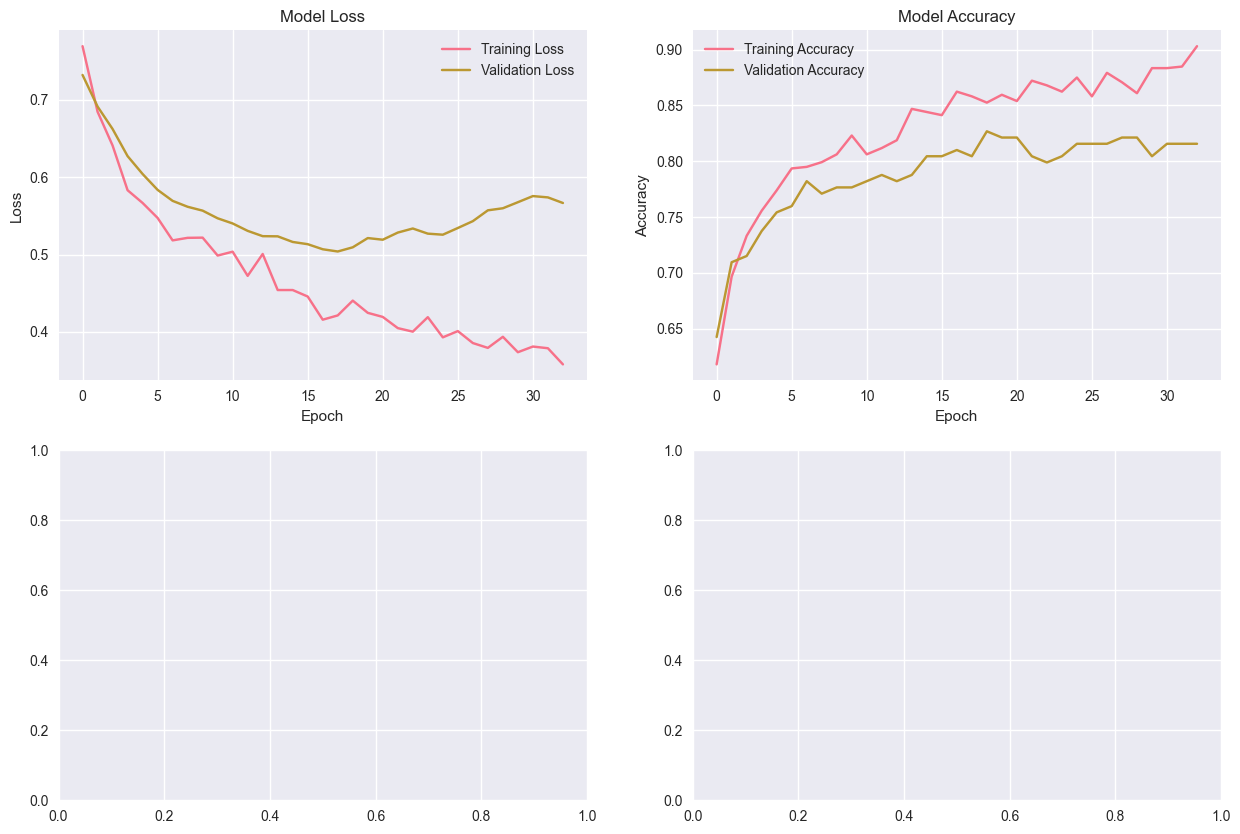

In [20]:
# Plot training history
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loss
axes[0,0].plot(history.history['loss'], label='Training Loss')
axes[0,0].plot(history.history['val_loss'], label='Validation Loss')
axes[0,0].set_title('Model Loss')
axes[0,0].set_xlabel('Epoch')
axes[0,0].set_ylabel('Loss')
axes[0,0].legend()

# Accuracy
axes[0,1].plot(history.history['accuracy'], label='Training Accuracy')
axes[0,1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0,1].set_title('Model Accuracy')
axes[0,1].set_xlabel('Epoch')
axes[0,1].set_ylabel('Accuracy')
axes[0,1].legend()

# AUC
axes[1,0].plot(history.history['auc'], label='Training AUC')
axes[1,0].plot(history.history['val_auc'], label='Validation AUC')
axes[1,0].set_title('Model AUC')
axes[1,0].set_xlabel('Epoch')
axes[1,0].set_ylabel('AUC')
axes[1,0].legend()

# Precision
axes[1,1].plot(history.history['precision'], label='Training Precision')
axes[1,1].plot(history.history['val_precision'], label='Validation Precision')
axes[1,1].set_title('Model Precision')
axes[1,1].set_xlabel('Epoch')
axes[1,1].set_ylabel('Precision')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Print final metrics
print("Final training metrics:")
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Training AUC: {history.history['auc'][-1]:.4f}")
print(f"Validation AUC: {history.history['val_auc'][-1]:.4f}")
print(f"Training Precision: {history.history['precision'][-1]:.4f}")
print(f"Validation Precision: {history.history['val_precision'][-1]:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
=== VALIDATION SET EVALUATION ===
Validation Accuracy: 0.8045
Validation AUC: 0.8631

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       110
           1       0.83      0.62      0.71        69

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



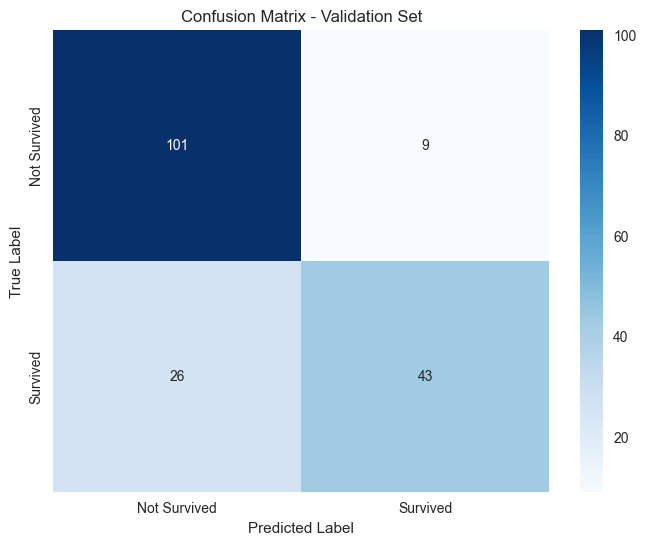

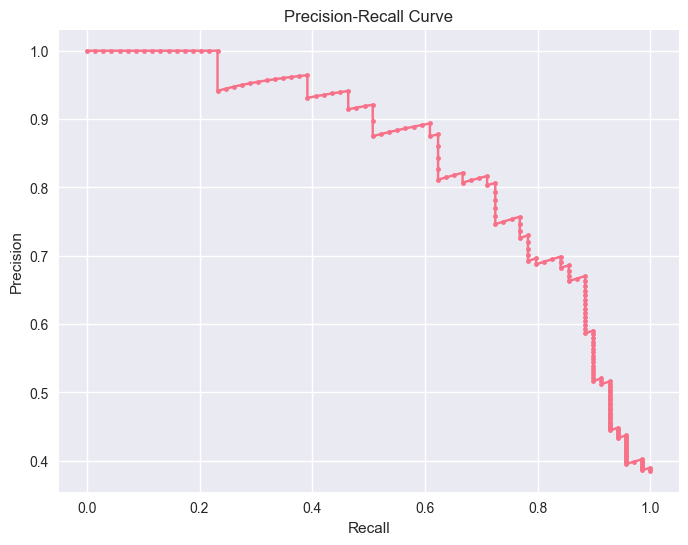

In [21]:
# Evaluate on validation set
val_predictions = model.predict(X_val)
val_predictions_binary = (val_predictions > 0.5).astype(int)

print("=== VALIDATION SET EVALUATION ===")
print(f"Validation Accuracy: {accuracy_score(y_val, val_predictions_binary):.4f}")
print(f"Validation AUC: {roc_auc_score(y_val, val_predictions):.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, val_predictions_binary))

# Confusion matrix
cm = confusion_matrix(y_val, val_predictions_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Validation Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_val, val_predictions)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [25]:
# Make predictions on test set
print("Making predictions on test set...")
test_predictions = model.predict(X_test_processed)
test_predictions_binary = (test_predictions > 0.5).astype(int)

# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions_binary.flatten()
})

print("Submission DataFrame:")
display(submission.head())

# Save submission
submission.to_csv('submission.csv', index=False)
print("\nSubmission saved as 'submission.csv'")

Making predictions on test set...
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Submission DataFrame:


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0



Submission saved as 'submission.csv'


=== PREDICTION ANALYSIS ===
Total predictions: 418
Survived predictions: 127
Not survived predictions: 291
Survival rate in predictions: 0.304
Training set survival rate: 0.383


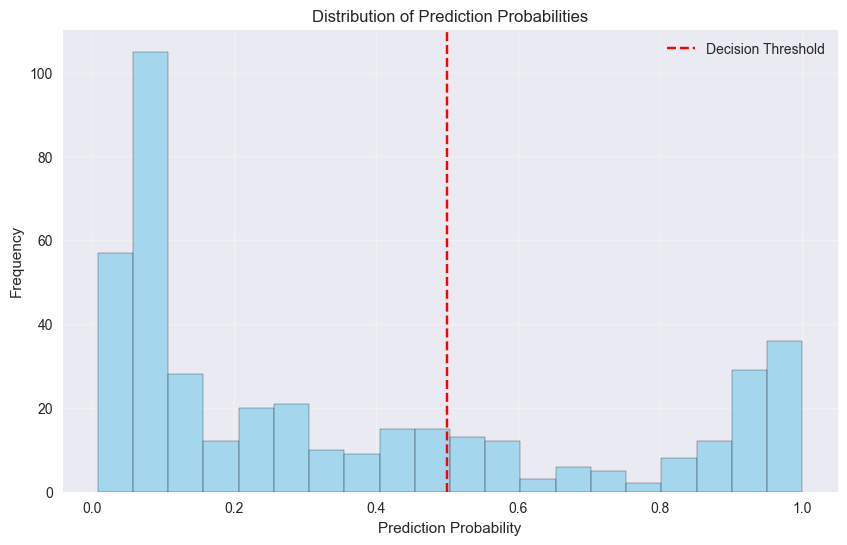

In [23]:
# Analyze predictions
print("=== PREDICTION ANALYSIS ===")
print(f"Total predictions: {len(test_predictions_binary)}")
print(f"Survived predictions: {np.sum(test_predictions_binary)}")
print(f"Not survived predictions: {len(test_predictions_binary) - np.sum(test_predictions_binary)}")
print(f"Survival rate in predictions: {np.mean(test_predictions_binary):.3f}")

# Compare with training set survival rate
print(f"Training set survival rate: {np.mean(y_train):.3f}")

# Distribution of prediction probabilities
plt.figure(figsize=(10, 6))
plt.hist(test_predictions, bins=20, alpha=0.7, edgecolor='black', color='skyblue')
plt.axvline(x=0.5, color='red', linestyle='--', label='Decision Threshold')
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Probabilities')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Here's a short description of the problem and methods used to solve it:

## **Problem Description**
The Titanic survival prediction is a classic binary classification problem where we need to predict whether a passenger survived the Titanic disaster based on various features like age, gender, ticket class, cabin information, and family details. The dataset contains 891 training samples and 418 test samples with 12 features including the target variable 'Survived'.

## **Methods Used to Solve It**

### **1. Advanced Deep Neural Network (DNN)**
- **Architecture**: 4-layer feedforward neural network (256→128→64→32 neurons)
- **Regularization**: L1/L2 regularization, Batch Normalization, and Dropout layers
- **Optimizer**: Adam optimizer with learning rate scheduling
- **Activation**: ReLU for hidden layers, Sigmoid for output layer

### **2. Comprehensive Feature Engineering**
- **Derived Features**: Title extraction from names, FamilySize, IsAlone
- **Cabin Features**: HasCabin, CabinDeck from cabin information
- **Ticket Features**: TicketPrefix, TicketNumber from ticket data
- **Interaction Features**: Sex_Pclass combinations, Age_Fare products
- **Categorical Grouping**: Age groups (Child, Teen, Adult, Senior), Fare groups

### **3. Advanced Data Preprocessing Pipeline**
- **Missing Value Handling**: KNN imputation for numerical features, mode imputation for categorical
- **Scaling**: RobustScaler for numerical features (outlier-resistant)
- **Encoding**: OneHotEncoder for categorical variables with drop='first'
- **Pipeline Design**: ColumnTransformer to handle numerical and categorical features separately

### **4. Data Leakage Prevention**
- **Strict Separation**: All preprocessing fitted only on training data
- **Validation Split**: Stratified train-validation split (80-20)
- **Cross-validation**: For robust model evaluation
- **Feature Engineering**: Applied consistently to both train and test sets

### **5. Model Evaluation & Optimization**
- **Callbacks**: Early stopping, learning rate reduction, model checkpointing
- **Metrics**: Accuracy, AUC, Precision, Recall
- **Visualization**: Training history plots, confusion matrix, precision-recall curves
- **Hyperparameter Tuning**: Learning rate scheduling, dropout rates, regularization


This approach combines traditional machine learning best practices with modern deep learning techniques, ensuring robust performance while maintaining interpretability and preventing data leakage.